# Practicing EDA on Wine Quality dataset

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(style='white', color_codes=True) # some styling parameters

In [2]:
wq=pd.read_csv('winequality_red.csv') # loading and reading data
wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wq.shape # checking rows and data

(1599, 12)

In [4]:
wq.dtypes # checking datatypes of given columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wq.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wq.info() # checking any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wq.describe() # Statistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Observations from above Statistical summary:

- We can see the Mean is more than Median in all columns (50th %tile)
- There can be seen huge difference in 75th %tile and max in residual sugar, free sulfur dioxide, total sulfur dioxide
- From observations 1 & 2, we can say there are outliers present in above particular columns

In [8]:
# Exploring data variables

wq.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Observations from above summary:

- The target variable is discrete and categorical in nature
- Quality score range is between 3 to 8; where 3 is poor quality and 8 is best quality

In [9]:
# Checking scores assigned to each columns

wq.quality.value_counts() # using Pandas method

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Observations from above summary:

- We can see, quality has most values assigned to categories of 5, 6, 7
- Few values are assigned to categories 3 and 8

<AxesSubplot:>

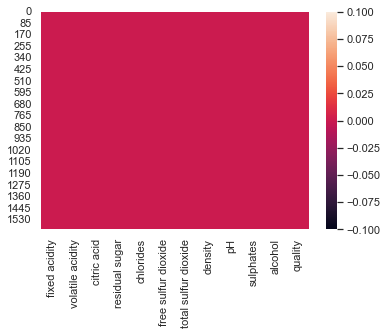

In [10]:
# Exploring Data visualization
# Cheking missing values if any

sb.heatmap(wq.isnull())

### Observations from above visualization:

- No missing values in the dataset

In [11]:
# Exploring Correlation

wqcor=wq.corr()
wqcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

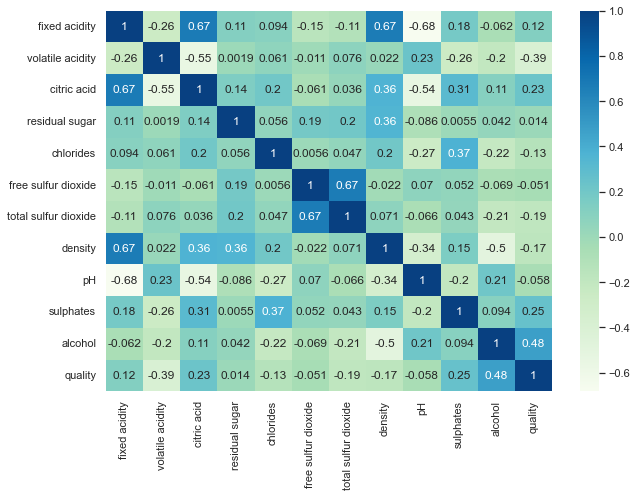

In [12]:
plt.figure(figsize=(10,7))
sb.heatmap(wqcor,cmap='GnBu',annot=True) # cmap is color map in Matplotlib; annot is to write the data value in each cell

### Observations from above visualization:

- Light shades are -ve correlated; Dark shade are +ve correlated
- Quality is highly +ve correlated with Alcohol
- Alcohol is highly -ve correlated with Density
- Density is +ve correlated with residual sugar
- free sulfur dioxide is +ve highly correlated with total sulfur dioxide

Hence we can drop volatile acidity from the dataset if we are proceeding with Linear Regression

# Plotting Outliers

## Univariate Analysis

<AxesSubplot:>

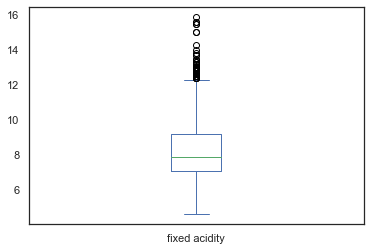

In [13]:
wq['fixed acidity'].plot.box()

<AxesSubplot:>

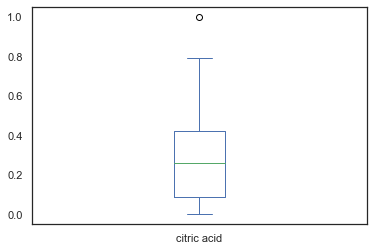

In [14]:
wq['citric acid'].plot.box()

<AxesSubplot:>

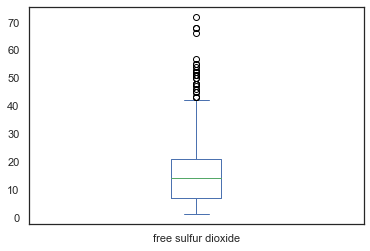

In [15]:
wq['free sulfur dioxide'].plot.box()

<AxesSubplot:>

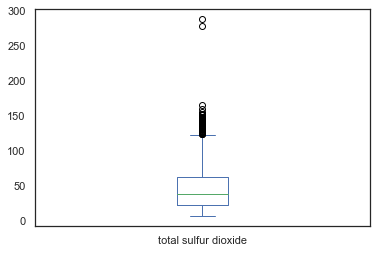

In [16]:
wq['total sulfur dioxide'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

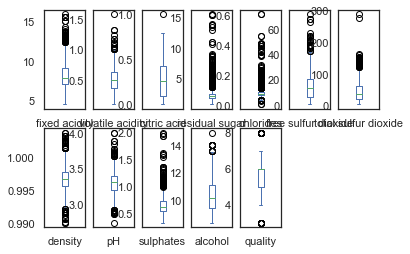

In [17]:
wq.plot(kind='box',subplots=True,layout=(2,7))

## Checking Skewness distribution

<AxesSubplot:xlabel='density', ylabel='Density'>

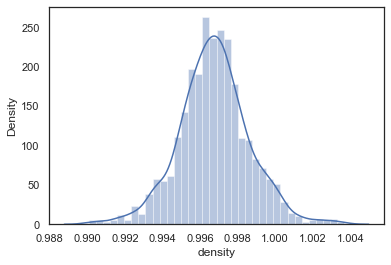

In [18]:
sb.distplot(wq['density'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

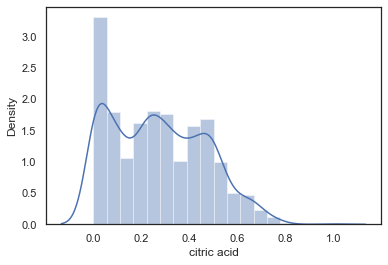

In [19]:
sb.distplot(wq['citric acid'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

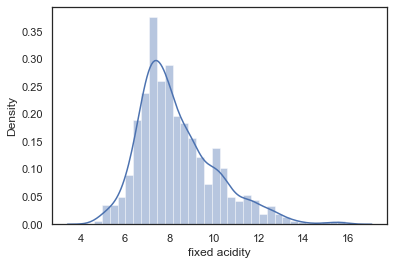

In [20]:
sb.distplot(wq['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

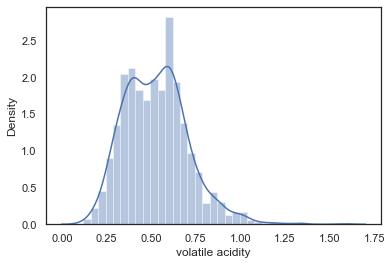

In [21]:
sb.distplot(wq['volatile acidity'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

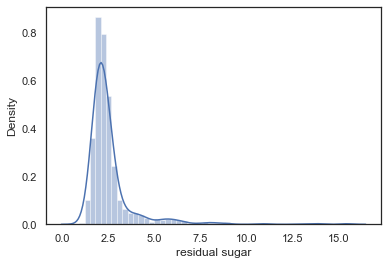

In [22]:
sb.distplot(wq['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

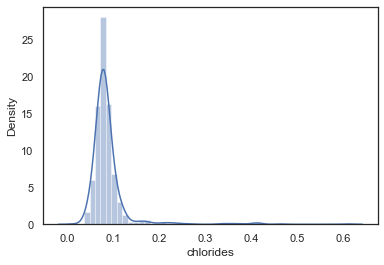

In [23]:
sb.distplot(wq['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

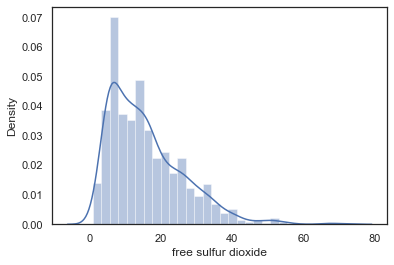

In [24]:
sb.distplot(wq['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

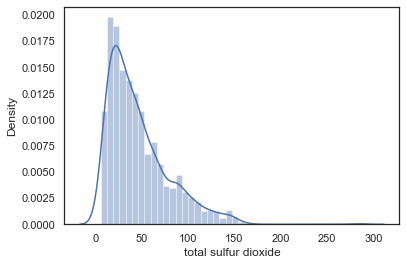

In [25]:
sb.distplot(wq['total sulfur dioxide'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

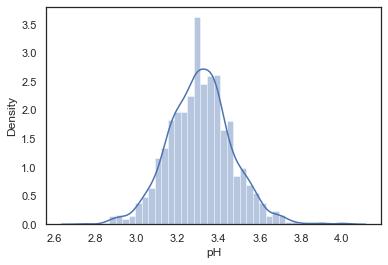

In [26]:
sb.distplot(wq['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

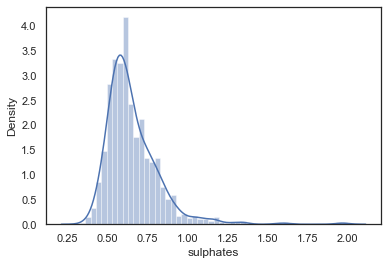

In [27]:
sb.distplot(wq['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

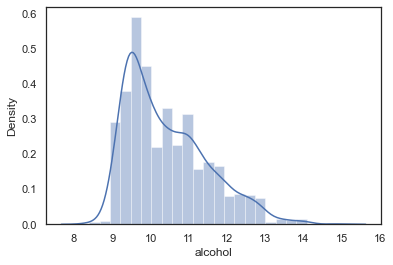

In [28]:
sb.distplot(wq['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Density'>

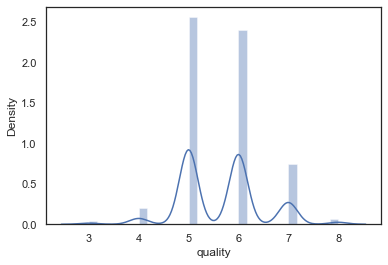

In [29]:
sb.distplot(wq['quality'])

### Observations from above visualization:

- Only density and pH data has normal distribution
- Rest are +vely skewed / right skewed

## Bivariate Analysis

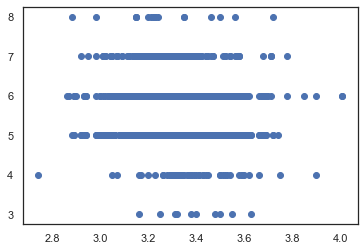

In [30]:
plt.scatter(wq['pH'],wq['quality'])

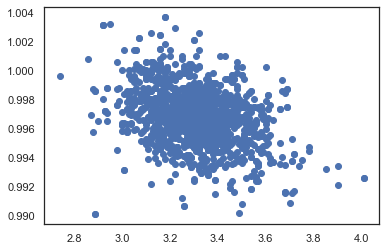

In [31]:
plt.scatter(wq['pH'],wq['density'])

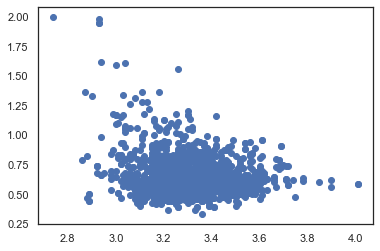

In [32]:
plt.scatter(wq['pH'],wq['sulphates'])

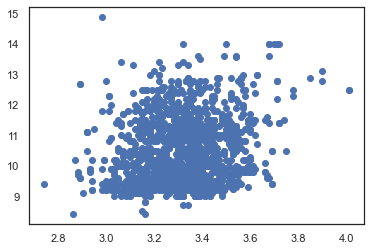

In [33]:
plt.scatter(wq['pH'],wq['alcohol'])

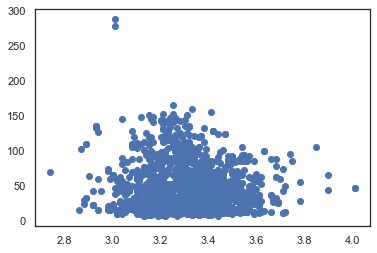

In [34]:
plt.scatter(wq['pH'],wq['total sulfur dioxide'])

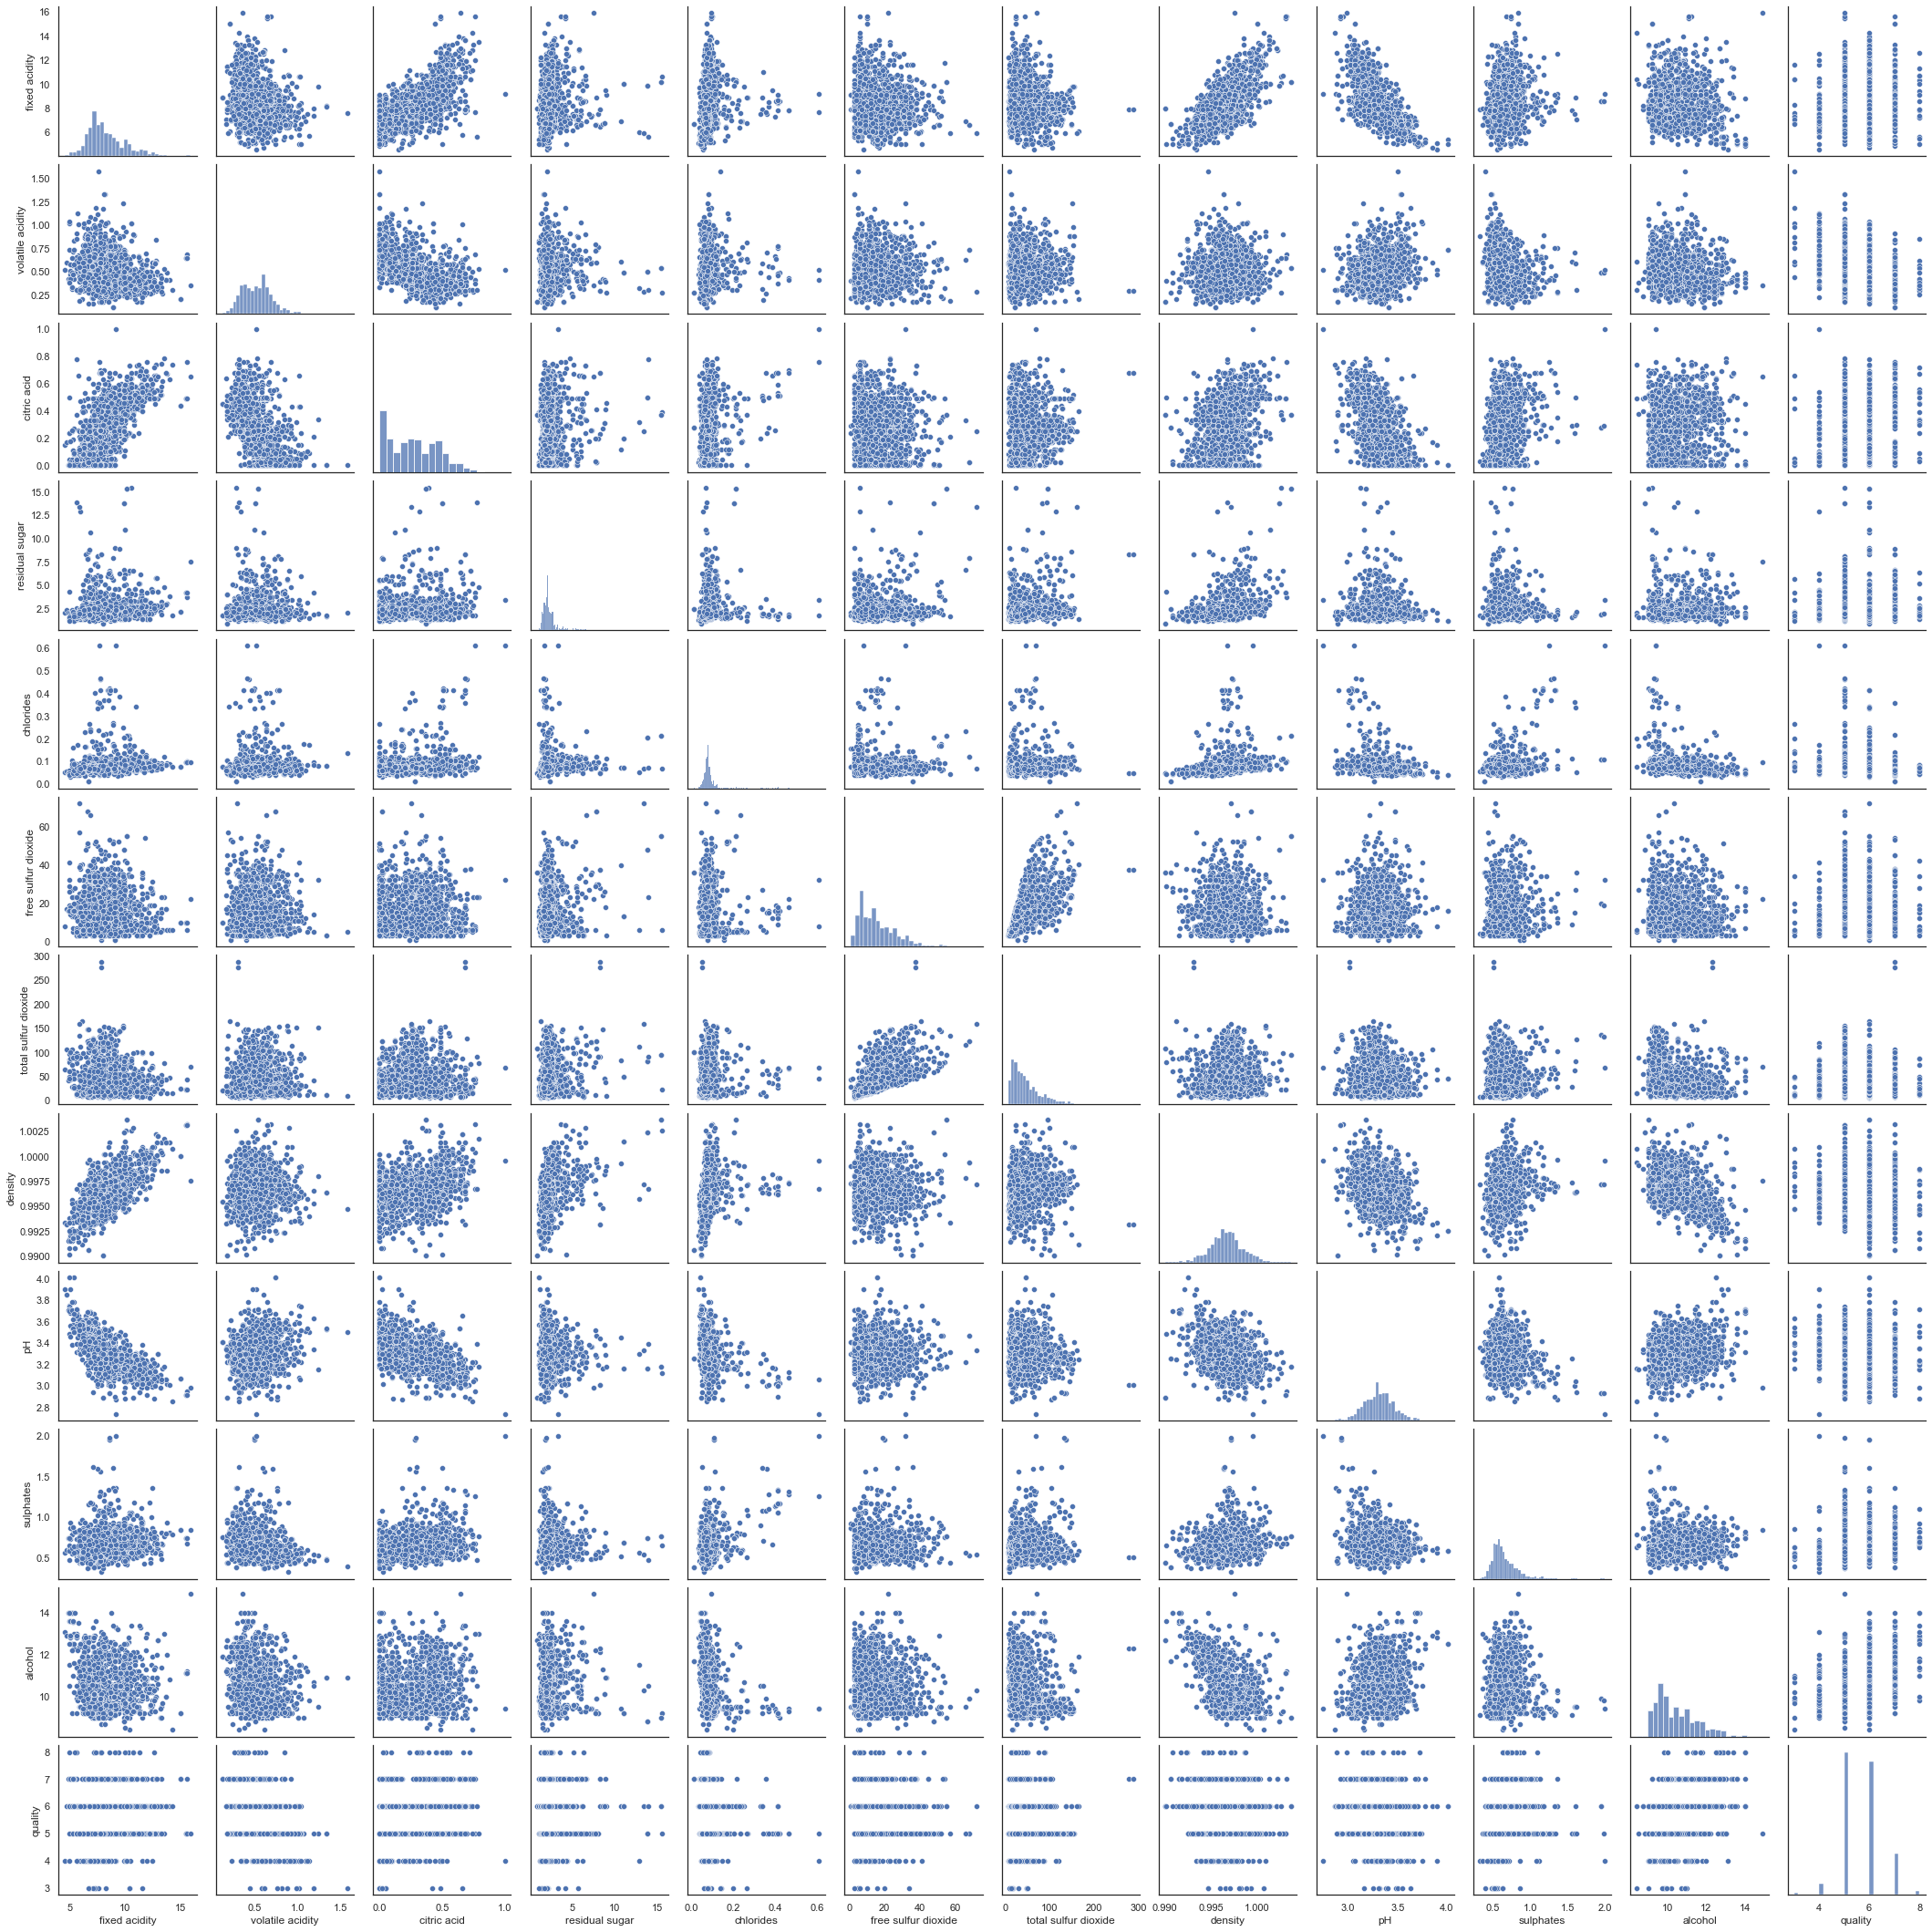

In [35]:
sb.pairplot(wq)

### Concluding from the above observations:

- First we will remove the missing values
- Next, we can drop the -vely correlated columns
- Lastly, we will remove the outliers

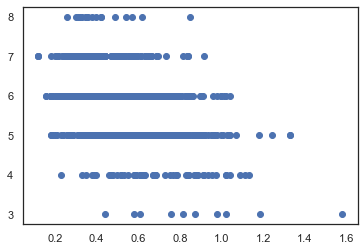

In [36]:
plt.scatter(wq['volatile acidity'],wq['quality']) # volatile acidity has no relationship with quality; hence dropping it
plt.show()

In [37]:
wq.drop('volatile acidity',axis=1,inplace=True) # axis = 1 means column and axis = 0 means row
wq.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# Removing outliers

from scipy.stats import zscore # importing ZScore
z=np.abs(zscore(wq))
z

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [39]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1